In [344]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points, plotting_positions
from reliability.Utils import axes_transforms, probability_plot_xylims, probability_plot_xyticks

import matplotlib.pyplot as plt
from matplotlib import ticker, colors, colormaps
import pandas as pd
from matplotlib.figure import figaspect
import seaborn as sns
import numpy as np
import string

# Example

Results from Fit_Weibull_2P (95% CI):
Analysis method: Least Squares Estimation (RRX)
Failures / Right censored: 20/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.1297          3.6749   21.7752   36.3385
     Beta         1.80611        0.316663   1.28087   2.54674 

Goodness of fit    Value
 Log-likelihood  -79.565
           AICc  163.836
            BIC  165.121
             AD 0.817695 



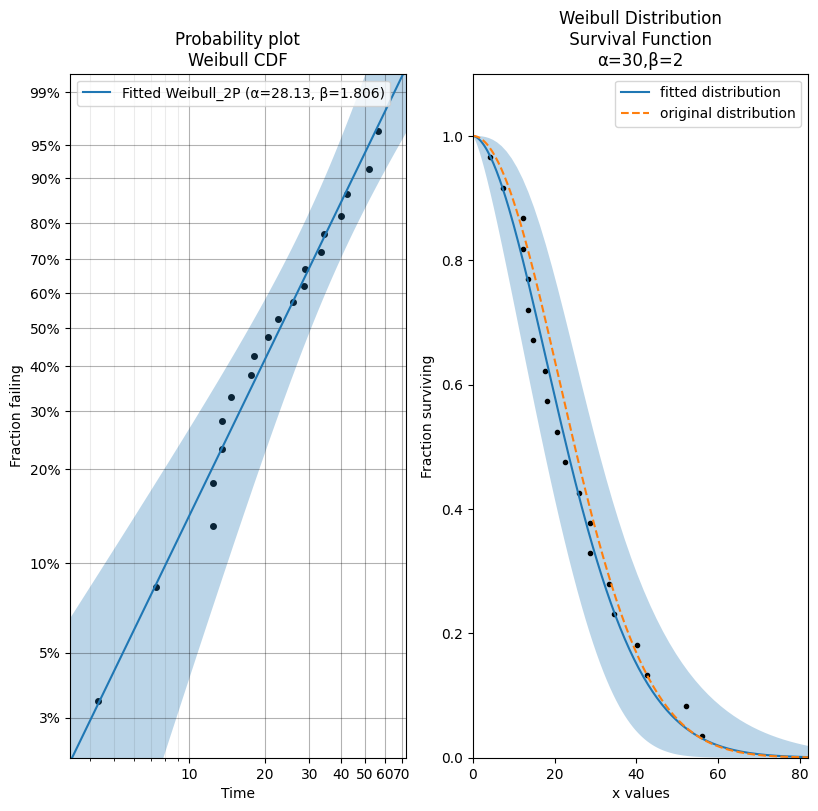

In [345]:
dist = Weibull_Distribution(alpha=30, beta=2)  # creates the distribution object
data = dist.random_samples(20, seed=42)  # draws 20 samples from the distribution. Seeded for repeatability
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data, method="LS")  # fits a Weibull distribution to the data and generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.SF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.show()

In [346]:
data

array([20.55094355, 52.04910458, 34.42486201, 28.66440822, 12.355662  ,
       12.35462111,  7.33858922, 42.54536142, 28.76063174, 33.28851237,
        4.32658956, 56.15337681, 40.09721423, 14.65670027, 13.43916254,
       13.50371358, 18.06871209, 25.87537532, 22.56065957, 17.60115602])

# 3.5mm Sample Test

In [347]:
test_data = pd.read_csv("Test_data.csv")

test_data

,Unnamed: 0,Proben-Nr.,Datum/Uhrzeit,Fcr,...,Moment,failure stress,Unnamed: 10,Diameter.1
0,NaN,NaN,NaN,N,...,Nmm,N/mm^2,NaN,mm
1,Probe 1,1,45420.6,22.85162354,...,342.8,76.7,NaN,3.57
2,Probe 2,2,45420.7,22.49817848,...,337.5,74.9,NaN,3.58
3,Probe 3,3,45420.7,18.44078827,...,276.6,62.4,NaN,3.56
4,Probe 4,4,45420.7,22.20804024,...,333.1,79.8,NaN,3.49
5,Probe 5,5,45420.7,23.90054512,...,358.5,83.7,NaN,3.52
6,Probe 6,6,45420.7,25.65187645,...,384.8,87.6,NaN,3.55
7,Probe 7,7,45420.7,26.03781509,...,390.6,87.4,NaN,3.57
8,Probe 8,8,45420.7,26.57203484,...,398.6,93.1,NaN,3.52
9,Probe 9,9,45420.7,18.93573761,...,284.0,65.8,NaN,3.53


In [348]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(test_data):
    # Drop columns: 'Unnamed: 0', 'Unnamed: 10'
    test_data = test_data.drop(columns=['Unnamed: 0', 'Unnamed: 10'])
    # Drop rows with missing data in column: 'Proben-Nr.'
    test_data = test_data.dropna(subset=['Proben-Nr.'])
    # Change column type to uint32 for column: 'Proben-Nr.'
    test_data = test_data.astype({'Proben-Nr.': 'uint32'})
    # Rename column 'Proben-Nr.' to 'Probe_Num'
    test_data = test_data.rename(columns={'Proben-Nr.': 'Probe_Num'})
    return test_data

test_data_clean = clean_data(test_data.copy())
test_data_clean.head()

,Probe_Num,Datum/Uhrzeit,Fcr,Diameter,...,span,Moment,failure stress,Diameter.1
1,1,45420.6,22.85162354,3.57,...,30.0,342.8,76.7,3.57
2,2,45420.7,22.49817848,3.58,...,30.0,337.5,74.9,3.58
3,3,45420.7,18.44078827,3.56,...,30.0,276.6,62.4,3.56
4,4,45420.7,22.20804024,3.49,...,30.0,333.1,79.8,3.49
5,5,45420.7,23.90054512,3.52,...,30.0,358.5,83.7,3.52


In [349]:
fail_data = test_data_clean['failure stress'].to_numpy(dtype="float32")
fail_data

array([ 76.7,  74.9,  62.4,  79.8,  83.7,  87.6,  87.4,  93.1,  65.8,
        71.2,  71.6,  89.5, 101.6, 105. ,  74.3,  78. ,  92. ,  94.6,
        81.5,  73.4,  79. ,  89.7,  83.6,  86.5, 115.6,  81.6,  60.4,
        87.8,  86.3, 102. ,  72.4,  85.9], dtype=float32)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Least Squares Estimation (RRY)
Failures / Right censored: 32/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         88.6653         2.15064   84.5487   92.9823
     Beta         7.99328        0.968069   6.30428   10.1348 

Goodness of fit    Value
 Log-likelihood -127.807
           AICc  260.028
            BIC  262.546
             AD  1.07659 



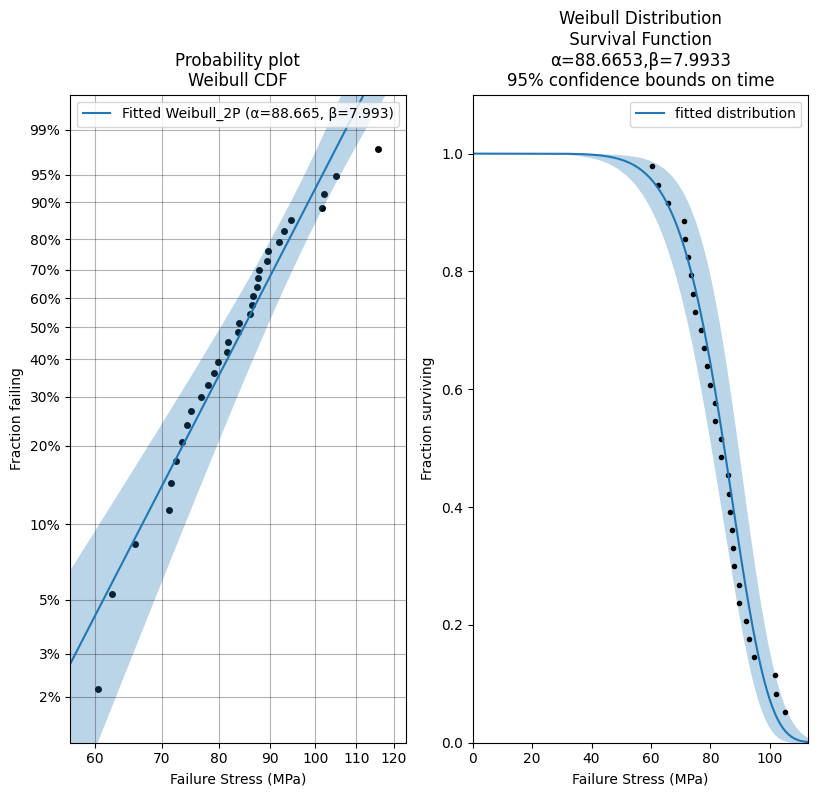

In [350]:
plt.clf()
plt.subplot(121)
test_fit = Fit_Weibull_2P(failures=fail_data, method="LS")  # fits a Weibull distribution to the data and generates the probability plot
plt.xlabel("Failure Stress (MPa)")
plt.subplot(122)
test_fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
plot_points(failures=fail_data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.xlabel("Failure Stress (MPa)")
plt.show()

In [351]:
fail_data

array([ 76.7,  74.9,  62.4,  79.8,  83.7,  87.6,  87.4,  93.1,  65.8,
        71.2,  71.6,  89.5, 101.6, 105. ,  74.3,  78. ,  92. ,  94.6,
        81.5,  73.4,  79. ,  89.7,  83.6,  86.5, 115.6,  81.6,  60.4,
        87.8,  86.3, 102. ,  72.4,  85.9], dtype=float32)

In [352]:
val_test = -8

fail_data[val_test]

np.float32(115.6)

In [353]:
cdf_test = test_fit.distribution.CDF(xvals=[fail_data[val_test]], show_plot=False) ## Calculates values along the line

print(fail_data[val_test], " ", cdf_test)

115.6   0.9997598194127818


In [354]:
test_points = plotting_positions(fail_data) ## Calculates where the points on the scatter should go

print(test_points[0][val_test], " ", test_points[1][val_test])

115.5999984741211   0.9783950617283951


# Full variation

## Load in and clean data

In [355]:
gcc_data = pd.read_csv("Maple Rod Testing Analysis.csv")

gcc_data

,Number,Fracture load,Fracture Stress,Fracture Diameter,Support Span,Load span,Surface Area,Volume
0,B1,46.7887,67.761,5.23,185,70,3039.65,3974.34
1,B2,85.8979,170.977,5.28,185,70,3068.71,4050.69
2,B3,54.1228,102.886,5.3,185,70,3080.33,4081.44
3,B4,64.6418,122.189,5.31,185,70,3086.14,4096.86
4,B5,78.9588,174.763,5.09,185,70,2958.28,3764.41
5,B6,57.2761,116.623,5.18,185,70,3010.59,3898.71
6,B7,68.1001,128.726,5.31,185,70,3086.14,4096.86
7,B8,80.9788,162.4,5.24,185,70,3045.46,3989.55
8,B9,56.073,108.539,5.22,185,70,3033.84,3959.16
9,B10,92.3955,179.794,5.32,185,70,3091.96,4112.3


In [356]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(gcc_data):
    # Drop rows with missing data in column: 'Fracture Stress'
    gcc_data = gcc_data.dropna(subset=['Fracture Stress'])
    return gcc_data

gcc_data_clean = clean_data(gcc_data.copy())
gcc_data_clean.head()

,Number,Fracture load,Fracture Stress,Fracture Diameter,Support Span,Load span,Surface Area,Volume
0,B1,46.7887,67.761,5.23,185,70,3039.65,3974.34
1,B2,85.8979,170.977,5.28,185,70,3068.71,4050.69
2,B3,54.1228,102.886,5.3,185,70,3080.33,4081.44
3,B4,64.6418,122.189,5.31,185,70,3086.14,4096.86
4,B5,78.9588,174.763,5.09,185,70,2958.28,3764.41


In [357]:
gcc_data_clean["Series"] = gcc_data_clean["Number"].str[0] ## Extract series letter from the "number" column

gcc_data_clean = gcc_data_clean.drop(gcc_data_clean[gcc_data_clean["Number"] == "D5"].index) ## Drop this outlier for now, remember to determine if this needs further inspection

gcc_data_clean

,Number,Fracture load,Fracture Stress,Fracture Diameter,Support Span,Load span,Surface Area,Volume,Series
0,B1,46.7887,67.761,5.23,185,70,3039.65,3974.34,B
1,B2,85.8979,170.977,5.28,185,70,3068.71,4050.69,B
2,B3,54.1228,102.886,5.3,185,70,3080.33,4081.44,B
3,B4,64.6418,122.189,5.31,185,70,3086.14,4096.86,B
4,B5,78.9588,174.763,5.09,185,70,2958.28,3764.41,B
5,B6,57.2761,116.623,5.18,185,70,3010.59,3898.71,B
6,B7,68.1001,128.726,5.31,185,70,3086.14,4096.86,B
7,B8,80.9788,162.4,5.24,185,70,3045.46,3989.55,B
8,B9,56.073,108.539,5.22,185,70,3033.84,3959.16,B
9,B10,92.3955,179.794,5.32,185,70,3091.96,4112.3,B


## Analyse data

In [358]:
gcc_data_anal = gcc_data_clean[["Fracture Diameter", "Series"]].groupby("Series").mean()

gcc_data_anal

,Fracture Diameter
Series,
B,5.248
C,1.6275
D,3.962
E,16.13
F,24.225
G,20.04
H,23.95
I,33.38
J,27


In [359]:
gcc_data_test = gcc_data_clean[gcc_data_clean["Number"].str.startswith("B")]["Fracture Stress"].to_numpy(dtype="float32")

In [360]:
unique_values = gcc_data_clean["Series"].unique()

In [361]:
w, h = figaspect(1.2)

fracture_prob = pd.DataFrame()

for letter in unique_values:
    fracture_frame = gcc_data_clean.loc[gcc_data_clean["Series"] == letter, ["Fracture Stress"]].copy()
    plot_data = fracture_frame.squeeze(axis=1).to_numpy(dtype="float32")

    if len(plot_data) < 2: continue
    
    avg_diameter = gcc_data_anal.loc[letter, "Fracture Diameter"]
    legend_text = "%s Series: ~%.2f mm" % (letter, avg_diameter)
    
    fracture_fit = Fit_Weibull_2P(failures=plot_data, print_results="print_results", label=legend_text, method="LS")  # fits a Weibull distribution to the data and generates the probability plot
   
    title_text = "Weibull probability\nScale= %.2f MPa  Shape= %.2f" % (fracture_fit.alpha, fracture_fit.beta)
    
    fig = fracture_fit.probability_plot.get_figure()
    fig.set_size_inches(w, h)
    plt.ylabel("Probability of failure")
    plt.xlabel("Failure Stress (MPa)")
    plt.title(title_text)
    plt.legend()
    # plt.subplot(122)
    # fracture_fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
    # plot_points(failures=plot_data, func='SF')  # overlays the original data on the survival function
    
    # plt.xlabel("Failure Stress (MPa)")

    fig.savefig("Figs/Series_" + letter, bbox_inches = "tight")
    plt.clf()

    fail_x, fail_y = plotting_positions(plot_data)

    fracture_frame.loc[:, "Fail Check"] = fail_x
    fracture_frame.loc[:, "Fail Prob"] = fail_y
    fracture_frame = fracture_frame.drop(["Fracture Stress"], axis=1)

    # gcc_data_clean.loc[letter, "Fail_check"] = fail_x
    # gcc_data_clean.loc[letter, "Fail_prob"] = fail_y

    fracture_prob =  pd.concat([fracture_prob, fracture_frame], axis=0)

    gcc_data_anal.loc[letter, "Alpha"] = fracture_fit.alpha
    gcc_data_anal.loc[letter, "Beta"] = fracture_fit.beta

<Figure size 400x480 with 0 Axes>

In [362]:
gcc_data_clean = pd.concat([gcc_data_clean, fracture_prob], axis=1)

In [363]:
gcc_data_anal

,Fracture Diameter,Alpha,Beta
Series,,,
B,5.248,147.631,3.73272
C,1.6275,243.097,3.46282
D,3.962,134.193,7.82771
E,16.13,81.0886,8.67882
F,24.225,65.0795,4.43198
G,20.04,NaN,NaN
H,23.95,NaN,NaN
I,33.38,NaN,NaN
J,27,NaN,NaN


In [364]:
gcc_data_clean

,Number,Fracture load,Fracture Stress,Fracture Diameter,...,Volume,Series,Fail Check,Fail Prob
0,B1,46.7887,67.761,5.23,...,3974.34,B,67.761,0.0673077
1,B2,85.8979,170.977,5.28,...,4050.69,B,170.977,0.740385
2,B3,54.1228,102.886,5.3,...,4081.44,B,102.886,0.163462
3,B4,64.6418,122.189,5.31,...,4096.86,B,122.189,0.451923
4,B5,78.9588,174.763,5.09,...,3764.41,B,174.763,0.836538
5,B6,57.2761,116.623,5.18,...,3898.71,B,116.623,0.355769
6,B7,68.1001,128.726,5.31,...,4096.86,B,128.726,0.548077
7,B8,80.9788,162.4,5.24,...,3989.55,B,162.4,0.644231
8,B9,56.073,108.539,5.22,...,3959.16,B,108.539,0.259615
9,B10,92.3955,179.794,5.32,...,4112.3,B,179.794,0.932692


### Double check the alignment of probability data

In [365]:
check_alignment = gcc_data_clean[["Fracture Stress", "Fail Check"]].dropna()

check_alignment = np.isclose(check_alignment["Fracture Stress"], check_alignment["Fail Check"])
check_alignment

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

[Text(0.5, 0, 'Diameter (mm)'),
 Text(0, 0.5, 'Scale (MPa)'),
 Text(0.5, 1.0, 'Weibull scale parameter vs. Diameter')]

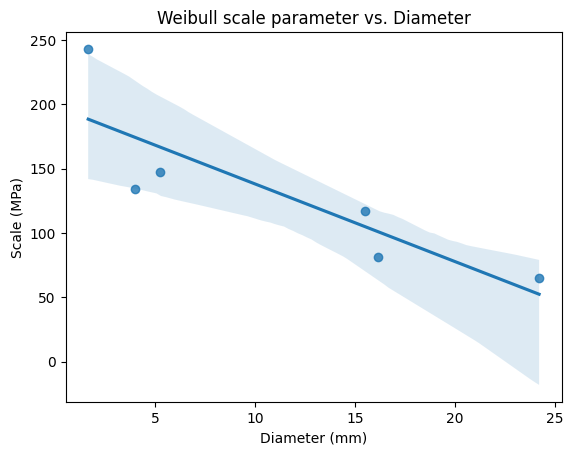

In [366]:
ax = sns.regplot(data=gcc_data_anal, x="Fracture Diameter", y="Alpha")
ax.set(xlabel="Diameter (mm)", ylabel="Scale (MPa)", title="Weibull scale parameter vs. Diameter")


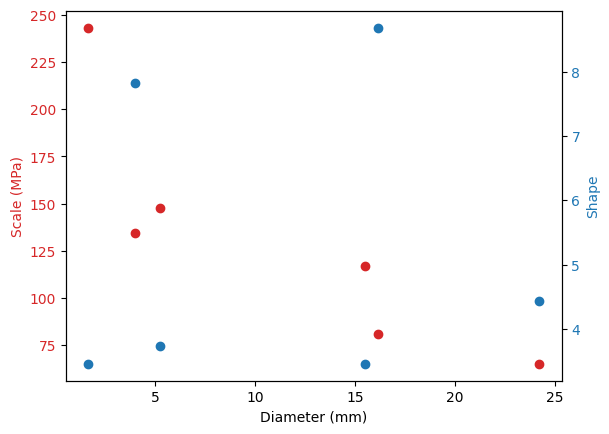

In [367]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Diameter (mm)")
ax1.set_ylabel('Scale (MPa)', color=color)
ax1.scatter("Fracture Diameter", "Alpha", data=gcc_data_anal.dropna(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Shape', color=color)  # we already handled the x-label with ax1
ax2.scatter("Fracture Diameter", "Beta", data=gcc_data_anal.dropna(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Size effect normalisation plot

In [368]:
def cylinder_SA(diameter: float, length: float) -> float: return np.pi * diameter * length
def cylinder_V(diameter: float, length: float) -> float: return np.pi * (diameter / 2)**2 * length

standard_SA = cylinder_SA(3.5, 185)
standard_V = cylinder_V(3.5, 185)

In [369]:
def size_effect_normalize(original_prob: float, original_size: float, standard_size: float) -> float:
    size_ratio = standard_size / original_size
    return 1 - (1 - original_prob)**size_ratio

In [370]:
size_effect_normalize(0.5, 2, 4)

0.75

In [371]:
def normalize_data(data, standard_diameter, standard_length):
    standard_SA = cylinder_SA(standard_diameter, standard_length)
    standard_V = cylinder_V(standard_diameter, standard_length)

    data["Fail Prob V Adj"] = data.apply(lambda row: size_effect_normalize(row["Fail Prob"], row["Volume"], standard_V), axis=1)
    data["Fail Prob SA Adj"] = data.apply(lambda row: size_effect_normalize(row["Fail Prob"], row["Surface Area"], standard_SA), axis=1)

    return data

In [372]:
## Adjusting failure probability according to volume

# gcc_data_clean["Fail Prob Adj"] = gcc_data_clean.apply(lambda row: size_effect_normalize(row["Fail Prob"], row["Volume"], standard_V), axis=1)
# gcc_data_clean

gcc_data_clean = normalize_data(gcc_data_clean, 3.5, 185)

gcc_data_clean

,Number,Fracture load,Fracture Stress,Fracture Diameter,...,Fail Check,Fail Prob,Fail Prob V Adj,Fail Prob SA Adj
0,B1,46.7887,67.761,5.23,...,67.761,0.0673077,0.0307243,0.0455604
1,B2,85.8979,170.977,5.28,...,170.977,0.740385,0.447093,0.590954
2,B3,54.1228,102.886,5.3,...,102.886,0.163462,0.0748839,0.111185
3,B4,64.6418,122.189,5.31,...,122.189,0.451923,0.229917,0.327238
4,B5,78.9588,174.763,5.09,...,174.763,0.836538,0.575299,0.712176
5,B6,57.2761,116.623,5.18,...,116.623,0.355769,0.181874,0.257025
6,B7,68.1001,128.726,5.31,...,128.726,0.548077,0.291826,0.407564
7,B8,80.9788,162.4,5.24,...,162.4,0.644231,0.369395,0.498573
8,B9,56.073,108.539,5.22,...,108.539,0.259615,0.126401,0.182531
9,B10,92.3955,179.794,5.32,...,179.794,0.932692,0.689003,0.83057


In [373]:
def fit_normalized_data(data, method):
    if method == "V":
        method_column = "Fail Prob V Adj"
    elif method == "SA":
        method_column = "Fail Prob SA Adj"
    else:
        raise("Please choose a valid method, volume (V) or surface area (SA)")
    
    least_squares_data = data[["Fracture Stress", method_column]].dropna()

    stress = least_squares_data["Fracture Stress"].to_numpy()
    fail_prob = least_squares_data[method_column].to_numpy()

    x = np.log(stress)
    y = np.log(-np.log(1-fail_prob))

    m, c = np.polyfit(x, y, 1)

    beta = m
    alpha = np.exp(-c / beta)

    return (alpha, beta)
    

In [374]:
# least_squares_data = gcc_data_clean[["Fracture Stress", "Fail Prob V Adj"]].dropna()

# stress = least_squares_data["Fracture Stress"].to_numpy()
# print("Stress = ", stress, "\n")

# fail_prob = least_squares_data["Fail Prob V Adj"].to_numpy()
# print("Fail prob = ", fail_prob)

In [375]:
# ## Forward transform for LS estimation

# x = np.log(stress)

# y = np.log(-np.log(1-fail_prob))

# m, c = np.polyfit(x, y, 1)
# print("m = ", m, "\n")
# print("c = ", c)

In [376]:
# # Reverse transform of LS data

# beta = m
# alpha = np.exp(-c / beta)

# print('alpha = ',alpha,"\n")
# print('beta = ',beta)

In [377]:
alpha_V, beta_V = fit_normalized_data(gcc_data_clean, "V")

print("alpha = ", alpha_V, "\n")
print("alpha = ", beta_V)

alpha =  165.43327229519625 

alpha =  4.4703275313419555


In [378]:
# normalise_unique_series = gcc_data_clean.dropna()["Series"].unique()
# normalise_unique_series

In [379]:
def plot_normalized_weibull(data, analysed_data, alpha, beta, method):
    if method == "V":
        method_column = "Fail Prob V Adj"
        method_title = "Volume"
    elif method == "SA":
        method_column = "Fail Prob SA Adj"
        method_title = "Surface Area"
    else:
        raise("Please choose a valid method, volume (V) or surface area (SA)")

    normalise_unique_series = data.dropna()["Series"].unique()
    
    normal_dist_x = np.linspace(40, 300, 200)
    normalised_dist_y = Weibull_Distribution(alpha=alpha, beta=beta).CDF(xvals=normal_dist_x, show_plot=False)

    plt.clf()
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(normal_dist_x, normalised_dist_y, label="Test")

    color = iter(plt.cm.Dark2(np.linspace(0, 1, len(normalise_unique_series))))
    title_text = method_title + " Normalised Weibull Probability\nScale= %.2f MPa  Shape= %.2f" % (alpha, beta)

    for i, letter in enumerate(normalise_unique_series):
        plot_data = data.loc[data["Series"] == letter]


        c = next(color)

        avg_diameter = analysed_data.loc[letter, "Fracture Diameter"]
        legend_text = "%s Series: ~%.2f mm" % (letter, avg_diameter)
        ax.scatter(data=plot_data, x="Fracture Stress", y=method_column, marker="^", color=c, label=legend_text)

    ax.set_yscale('function', functions=(axes_transforms.weibull_forward, axes_transforms.weibull_inverse))
    ax.set_xscale("log")

    probability_plot_xyticks()
    probability_plot_xylims(normal_dist_x, normalised_dist_y, "weibull")

    ax.set_xlabel("Failure Stress (MPa)")
    ax.set_ylabel("Probability of failure")
    ax.set_title(title_text)

    ax.grid(zorder=2)
    ax.set_axisbelow(True)
    ax.legend()
    plt.gcf().set_size_inches(6, 9)
    plt.show()

In [380]:
# # Plot the transformed data
# normalise_unique_series = gcc_data_clean.dropna()["Series"].unique()

# normal_dist_x = np.linspace(40, 300, 200)

# normalised_dist_y = Weibull_Distribution(alpha=alpha, beta=beta).CDF(xvals=normal_dist_x, show_plot=False)

# plt.clf()
# fig, ax = plt.subplots(layout="constrained")
# ax.plot(normal_dist_x, normalised_dist_y, label="")

# color = iter(plt.cm.Dark2(np.linspace(0, 1, len(normalise_unique_series))))
# title_text = "Volume Normalised Weibull Probability\nScale= %.2f MPa  Shape= %.2f" % (alpha, beta)

# for i, letter in enumerate(normalise_unique_series):
#     plot_data = gcc_data_clean.loc[gcc_data_clean["Series"] == letter]


#     c = next(color)

#     avg_diameter = gcc_data_anal.loc[letter, "Fracture Diameter"]
#     legend_text = "%s Series: ~%.2f mm" % (letter, avg_diameter)
#     ax.scatter(data=plot_data, x="Fracture Stress", y="Fail Prob V Adj", marker="^", color=c, label=legend_text)

# ax.set_yscale('function', functions=(axes_transforms.weibull_forward, axes_transforms.weibull_inverse))
# ax.set_xscale("log")

# probability_plot_xyticks()
# probability_plot_xylims(normal_dist_x, normalised_dist_y, "weibull")

# ax.set_xlabel("Failure Stress (MPa)")
# ax.set_ylabel("Probability of failure")
# ax.set_title(title_text)

# ax.grid(zorder=2)
# ax.set_axisbelow(True)
# ax.legend()
# plt.gcf().set_size_inches(6, 9)
# plt.show()

<Figure size 640x480 with 0 Axes>

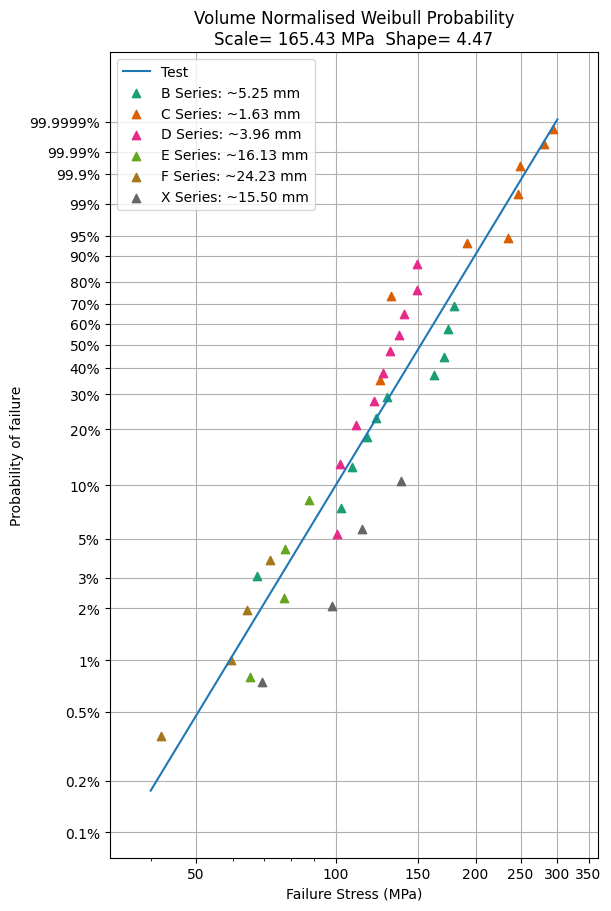

In [381]:
plot_normalized_weibull(gcc_data_clean, gcc_data_anal, alpha_V, beta_V, "V")

In [382]:
alpha_SA, beta_SA = fit_normalized_data(gcc_data_clean, "SA")

print("m = ", alpha_SA, "\n")
print("c = ", beta_SA)

m =  167.54783959756156 

c =  2.85142484964129


<Figure size 640x480 with 0 Axes>

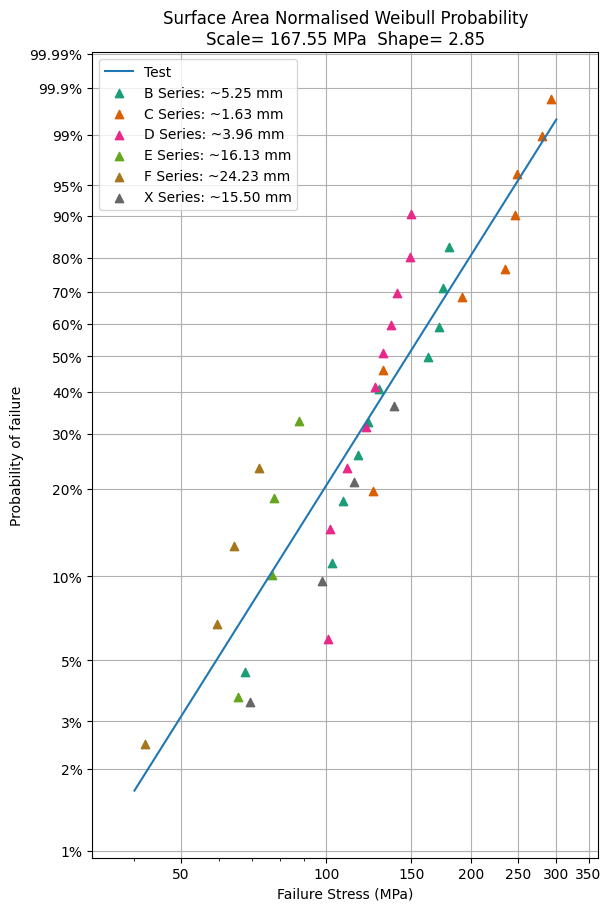

In [383]:
plot_normalized_weibull(gcc_data_clean, gcc_data_anal, alpha_SA, beta_SA, "SA")